Our first task is to use Fourier transform for image compression. This would demonstrate the utility of the frequency domain to obtain a version of an jpeg image with different levels of redundnacy. We would have $0.1, 0.05, 0.01$ and $0.002$ and that would enable us to see just exactly how much of the actual data we need to have a resoanble representation of the file. The first step as usual is to import the libraries.

In [47]:
from matplotlib.image import imread # This is to read the file
import numpy as np
import matplotlib.pyplot as plt
import os

We are working with an image so it is good idea to display it as we want. 

In [48]:
plt.rcParams['figure.figsize'] = [12, 8] # This is the size of the image 
plt.rcParams.update({'font.size': 18}) # This is the font size for any labels etc. 

Now we import the image and allot the variable name $A$ to it.

In [49]:
A = imread('afghan_girl.jpg')

Now we need the grayscale image. The reason we do this is because of ease of representation. The RGB image has three layers whereas grayscale where each pixel is a shade of gray is a less cumbersome representation of the same data. 

In [50]:
B= np.mean(A, -1)

Now we implement the Fast Fourier transform. This is a numerically efficient way of taking the discrete Fourier transform.

In [51]:
Bft = np.fft.fft2(B) #Bt stands for B Fourier transformed

Now comes the crux of the process and surprisingly it is very simple in this frequency domain. What we do is that we take a threshold value and below that value everything is made equal to zero in the transformed array(remember a grayscale image is an array). The numbers $0.1, 0.05, 0.01$ and $0.002$ that we associated with redundancy are now going to become the fractions of the array that we keep.

In [52]:
if(B.shape==Bft.shape):print("What else did you expect?") #We are just being cheeky here. We know they would be of the same dimensions.

What else did you expect?


Now we sort the grayscale fourier transformed values as we need to threshold by their magnitude.

In [53]:
Btsort = np.sort(np.abs(Bft.reshape(-1))) # sort by magnitude

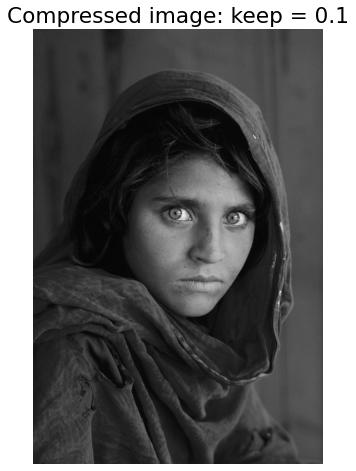

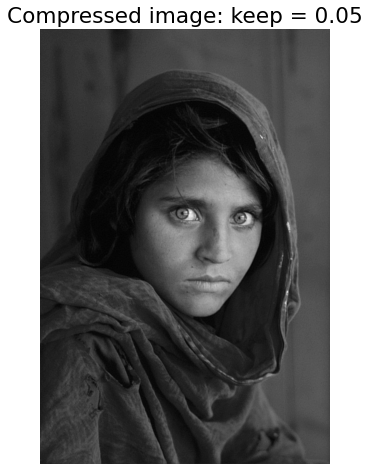

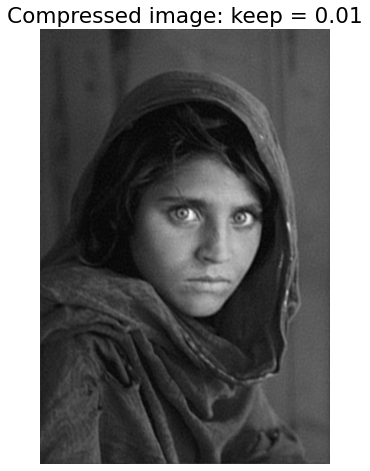

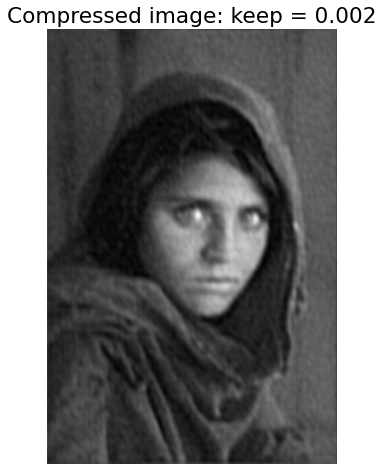

In [54]:
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bft)>thresh          # Find small indices
    Atlow = Bft * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

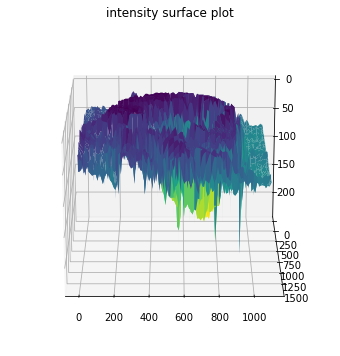

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [6, 6]
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
X,Y=np.meshgrid(np.arange(1,np.shape(B)[1]+1),np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],B[0::10,0::10],cmap='viridis',edgecolor='none')
ax.set_title('intensity surface plot')
ax.mouse_init()
ax.view_init(200,270)
plt.show()